In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
idNum = "5002"

In [2]:
r = requests.get('http://ec2-54-175-179-28.compute-1.amazonaws.com/get_thinktron_data.php?device_id=5001&year_month=201909')
soup = BeautifulSoup(r.text,'lxml')
a = list(soup.find_all('p'))

# Split the list through the regular expression
d = re.split('\s+|,|<br/>',str(a))

# Remove the '' element from the list
d = list(filter(lambda zz: zz != '', d)) 

# Remove the '=' element from the list
d = list(filter(lambda zz: zz != '=', d))

# Create a dataframe from the URL by data crawling
colName=['id', 'time', 'roll', 'pitch', 'yaw','field1','field2','field3']
_Num = 0
_df  = pd.DataFrame(columns=colName)
df   = pd.DataFrame(columns=colName)

for ii in range(0,len(d)):    
    while colName[_Num] in d[ii]:
        _lst = d[ii + 1]
        _lst = _lst.strip(',')
        
        if _lst == '' or (_lst in colName):
            _lst = None       
        
        _df[colName[_Num]] = [_lst] # Put the list into the dataframe
        if _Num < (len(colName)-1):
            _Num += 1
        else:
            df = df.append(_df, ignore_index=True)
            _Num = 0 

#df.to_csv('Result.csv')

# Convert argument to a numeric type(float64 or int64)
numericCol = ['roll', 'pitch', 'yaw','field1','field2','field3']
for ii in numericCol:
    df[ii] = pd.to_numeric(df[ii])

# Convert the format of date
import datetime
dates = df.time
df.index = pd.to_datetime(dates.astype(str), format='%Y%m%d%H%M%S')
df.index.name = 'time'
del df['time']

# Check dataframe format
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1457 entries, 2019-09-04 15:54:45 to 2019-09-30 12:27:12
Data columns (total 7 columns):
id        1457 non-null object
roll      1457 non-null float64
pitch     1457 non-null float64
yaw       1457 non-null int64
field1    1457 non-null int64
field2    1457 non-null int64
field3    1457 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 91.1+ KB


In [9]:
import pandas as pd
import numpy as np
# Read the raw csv file
df = pd.read_csv('INCM01_5002_v2.csv',header = None, sep = ',')
#df1= df.drop(3,axis = 1)

# Convert the format of date
dates = df[0]
df.index = pd.to_datetime(dates.astype(str), format='%Y%m%d%H%M%S')
df.index.name = 'Date'
del df[0]
df.columns = ['ID','roll','pitch','yaw','field1','field2','field3']

In [4]:
df.head()

,ID,roll,pitch,yaw,field1,field2,field3
Date,,,,,,,
2019-09-04 18:12:15,5002,-1.60,-0.49,0,93,0,0
2019-09-04 18:21:22,5002,-1.48,-0.50,0,93,0,0
2019-09-04 18:28:23,5002,-1.39,-0.65,0,93,0,0
2019-09-04 18:32:19,5002,-1.69,-0.53,0,93,0,0
2019-09-04 18:38:12,5002,-1.43,-0.52,0,92,0,0


In [10]:
# Set range of plotting data
startTime = "20190922213424" # 5002
# startTime = "20190917124432" # 5001
# startTime = "20190923192321" # 5001

startTime = pd.to_datetime(startTime, format='%Y%m%d%H%M%S')
dfPlot = df.loc[startTime:]

In [67]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dfPlot)
    print(dfPlot.info())

                       ID  roll  pitch  yaw  field1  field2  field3
2019-09-22 21:34:24  5002 -1.95  -0.68  0.0    92.0     0.0     0.0
2019-09-22 21:44:33  5002 -1.61  -0.43  0.0    91.0     0.0     0.0
2019-09-22 21:54:52  5002 -1.91  -0.51  0.0    90.0     0.0     0.0
2019-09-22 22:05:11  5002 -1.66  -0.54  0.0    92.0     0.0     0.0
2019-09-22 22:15:30  5002 -1.95  -0.64  0.0    92.0     0.0     0.0
2019-09-22 22:25:49  5002 -1.81  -0.62  0.0    91.0     0.0     0.0
2019-09-22 22:36:09  5002 -1.74  -0.57  0.0    91.0     0.0     0.0
2019-09-22 22:46:28  5002 -1.80  -0.57  0.0    92.0     0.0     0.0
2019-09-22 22:56:48  5002 -1.85  -0.64  0.0    92.0     0.0     0.0
2019-09-22 23:06:43  5002 -1.83  -0.58  0.0    91.0     0.0     0.0
2019-09-22 23:16:37  5002 -1.82  -0.63  0.0    91.0     0.0     0.0
2019-09-22 23:26:56  5002 -1.69  -0.65  0.0    91.0     0.0     0.0
2019-09-22 23:37:15  5002 -1.79  -0.51  0.0    91.0     0.0     0.0
2019-09-22 23:47:10  5002 -1.91  -0.52  0.0    9

In [11]:
from datetime import datetime
from datetime import timedelta
threshold = timedelta(minutes = 15)

# Creat an empty dataframe 
_df = pd.DataFrame({"ID":[5002],
                    "roll":[np.nan],
                    "pitch":[np.nan],
                    "yaw":[np.nan],
                    "field1":[np.nan],
                    "field2":[np.nan],
                    "field3":[np.nan]})
_df.index.name = 'time'

countNum = 0
startIndexNum = 0
while True:
    try:
        for ii in range(startIndexNum, len(dfPlot)):
            dt  = dfPlot.index[ii+1]-dfPlot.index[ii]        
            if (dt > threshold):
                # Put the row of NaN values into dataframe
                _dt = dfPlot.index[ii]-dfPlot.index[ii-1]
                _timestamp = dfPlot.index[ii] + _dt
                _df.index = [pd.to_datetime(_timestamp)] # Creat a list for containing a timestamp!!
                dfPlot = dfPlot.append(_df)
                dfPlot = dfPlot.sort_index()
                startIndexNum = ii + 1
                #print("countNum: ", countNum)
                #print("startIndexNum: ", startIndexNum)
                countNum += 1
                break
    except:
            print("Done!")
            break

Done!


D:\PythonProgm\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


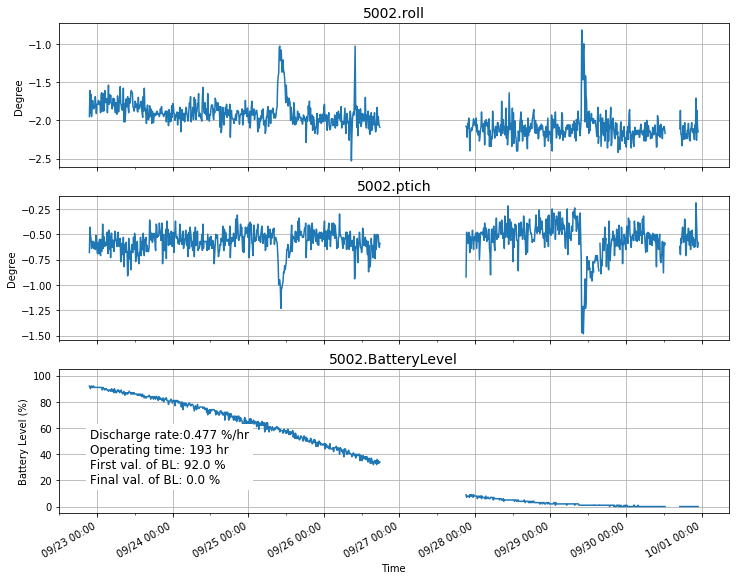

In [12]:
fig = plt.figure(num=1, figsize=[12,10])

plt.subplot(3, 1, 1)
# Share the x axis limits for one axis with another by passing an axes instance as a sharex
ax1 = plt.subplot(311)
ax1.set_title(idNum +'.roll', fontdict = {'fontsize':14})
dfPlot.roll.plot()
#plt.ylim(-5.2, -4.199)
#plt.yticks(np.arange(-5.2, -4.199, step=0.2))
plt.ylabel('Degree')
minorLocator = MultipleLocator(0.5)
ax1.xaxis.set_minor_locator(minorLocator)
ax1.grid()

plt.subplot(3, 1, 2)
ax2 = plt.subplot(312, sharex=ax1)
ax2.set_title(idNum +'.ptich', fontdict = {'fontsize':14})
dfPlot.pitch.plot()
#plt.ylim(-1.4, -0.2)
#plt.yticks(np.arange(4, 5.4, step=0.2))
plt.ylabel('Degree')
minorLocator = MultipleLocator(0.5)
ax2.xaxis.set_minor_locator(minorLocator)
ax2.grid()

plt.subplot(3, 1, 3)
ax3 = plt.subplot(313, sharex=ax1)
ax3.set_title(idNum +'.BatteryLevel', fontdict = {'fontsize':14})

#dfPlot.field1[dfPlot.field1 == 0] = np.nan
dfPlot.field1.plot()
#plt.plot(plotDF2018.y)
plt.ylim(-5, 105)
plt.yticks(np.arange(0, 105, step = 20))

plt.xticks(rotation = 30)

# Calculate and text the "Battery Discharge Rate" 
# Unit in [Battery Lev./hr]
dt = dfPlot.index[-1] - dfPlot.index[0]
BLev = dfPlot.field1[0] - dfPlot.field1[-1]
dt_hours = dt.days*24 + dt.seconds//3600 # Unit in hr
rate = BLev/dt_hours
rate = round(rate, 3)
ax3.text(dfPlot.index[1],18,
         "Discharge rate:" + str(rate) + " %/hr\n" +
         "Operating time: "+ str(dt_hours) +" hr\n" +
         "First val. of BL: " + str(dfPlot.field1[0]) + " %\n" +
         "Final val. of BL: " + str(dfPlot.field1[-1]) + " %",
         fontsize = 12, 
         bbox=dict(facecolor="white", alpha = 1, edgecolor = "none" ))

ax3.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d %H:%M"))
#ax3.xaxis.set_minor_formatter(mdates.DateFormatter("%m/%d %H:%M"))
minorLocator = MultipleLocator(0.5)
ax3.xaxis.set_minor_locator(minorLocator)
ax3.grid()

plt.xlabel('Time')
plt.ylabel('Battery Level (%)')
plt.show()

fig.savefig('incline_ana_' + idNum + '.jpg', dpi= 400)

92.0

In [77]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dfPlot)
    print(dfPlot.info())

                       ID  roll  pitch  yaw  field1  field2  field3
2019-09-22 21:34:24  5002 -1.95  -0.68  0.0    92.0     0.0     0.0
2019-09-22 21:44:33  5002 -1.61  -0.43  0.0    91.0     0.0     0.0
2019-09-22 21:54:52  5002 -1.91  -0.51  0.0    90.0     0.0     0.0
2019-09-22 22:05:11  5002 -1.66  -0.54  0.0    92.0     0.0     0.0
2019-09-22 22:15:30  5002 -1.95  -0.64  0.0    92.0     0.0     0.0
2019-09-22 22:25:49  5002 -1.81  -0.62  0.0    91.0     0.0     0.0
2019-09-22 22:36:09  5002 -1.74  -0.57  0.0    91.0     0.0     0.0
2019-09-22 22:46:28  5002 -1.80  -0.57  0.0    92.0     0.0     0.0
2019-09-22 22:56:48  5002 -1.85  -0.64  0.0    92.0     0.0     0.0
2019-09-22 23:06:43  5002 -1.83  -0.58  0.0    91.0     0.0     0.0
2019-09-22 23:16:37  5002 -1.82  -0.63  0.0    91.0     0.0     0.0
2019-09-22 23:26:56  5002 -1.69  -0.65  0.0    91.0     0.0     0.0
2019-09-22 23:37:15  5002 -1.79  -0.51  0.0    91.0     0.0     0.0
2019-09-22 23:47:10  5002 -1.91  -0.52  0.0    9

In [142]:
dfPlot.field1[0]

92